In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
subjects = ["C001","C002","C003","C004","C005","C006"]
subjects_lh = ["C001","C002","C003","C005"]
subjects_rh = ["C004"]
datasets = []
for subject in subjects:
    exec(subject +'= pd.read_csv(\'../data/combined/'+subject+'_conditions.csv\')')

for subject in subjects: 
    exec(subject + '_lh = ' + subject + '['+ subject + '["Hemisphere"]=="lh"]')
    exec(subject + '_rh = ' + subject + '['+ subject + '["Hemisphere"]=="rh"]')


## Unmasked Hemispheres

In [3]:
data = pd.concat([C001_lh,C002_lh,C003_lh,C004_rh,C005_lh,C006_lh], ignore_index = True)
data.head()

R^2       x0      y0   Sigma     Beta  Baseline  Field Sign     Cmf  \
0  0.74564  1.34400 -3.5008  2.6810  0.52992  0.014353           1  1.5021   
1  0.72856  1.26740 -3.8822  2.6468  0.51909  0.013824           1  1.4068   
2  0.74173  1.33140 -3.6100  2.6795  0.52719  0.014237           1  1.4647   
3  0.75433  1.45630 -3.3200  2.7574  0.53532  0.014779           1  1.3954   
4  0.71966  0.97477 -3.4688  2.3771  0.52333  0.013241           1  1.7224   

   Visual area  Eccentricity     Polar Location Subject Condition Hemisphere  
0     0.038602      3.749925  0.004907      V3B    C001       ret         lh  
1     0.167870      4.083844  0.004998      V3B    C001       ret         lh  
2     0.036718      3.847691  0.004931      V3B    C001       ret         lh  
3     0.148950      3.625356  0.004825      V3B    C001       ret         lh  
4     0.175690      3.603158  0.005071      V3B    C001       ret         lh

### Combine locations

In [4]:
V3AB = []
V2 = []
V3 = []
hMT = []
for index, row in data.iterrows():
    if row.Location == "V3A" or row.Location == "V3B":
        V3AB.append(index)
    if row.Location == "V2v" or row.Location == "V2d":
        V2.append(index)
    if row.Location == "V3v" or row.Location == "V3d":
        V3.append(index)
    if row.Location == "TO2":
        hMT.append(index)

In [5]:
data.loc[V3AB, "Location"] = "V3AB"
data.loc[V2, "Location"] = "V2"
data.loc[V3, "Location"] = "V3"
data.loc[hMT, "Location"] = "hMT+"

## Compare R^2 distribution

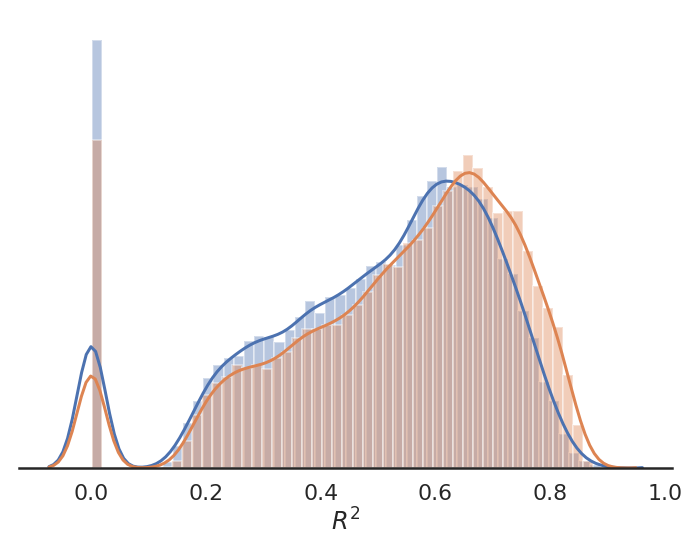

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.set_context('poster')
a = sns.distplot(data['R^2'][data['Condition']=='mot'],label='Motion')
a = sns.distplot(data['R^2'][data['Condition']=='ret'],label='Retinotopic')
plt.tick_params(axis='y',which='both', left=False, labelleft=False) 
sns.despine(top=True,left=True)
a.set(xlabel=r"$R^2$")
#plt.legend()
x = a.get_figure()
#x.savefig("../plots/conditions.png", format='png')

In [7]:
from scipy.stats import wilcoxon
stat, p = wilcoxon(data['R^2'][data['Condition']=='mot'], data['R^2'][data['Condition']=='ret'])
print(stat, p)

495991129.0 4.7011841426030595e-303


In [8]:
len(data['R^2'][data['Condition']=='ret'])

49929

## Different visual areas

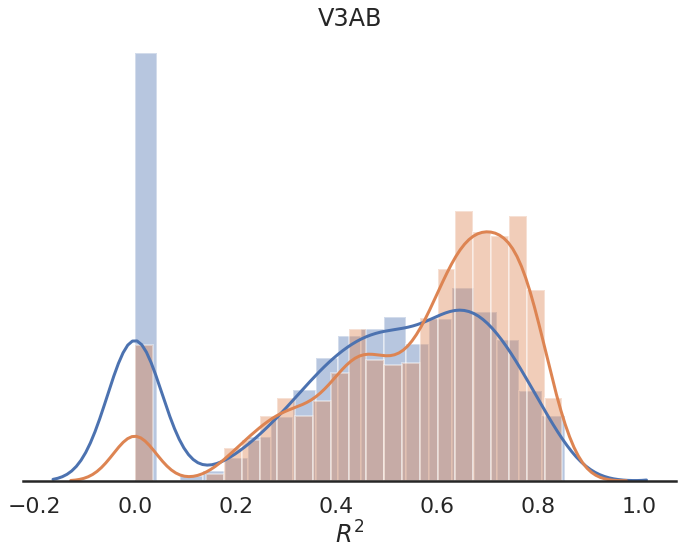

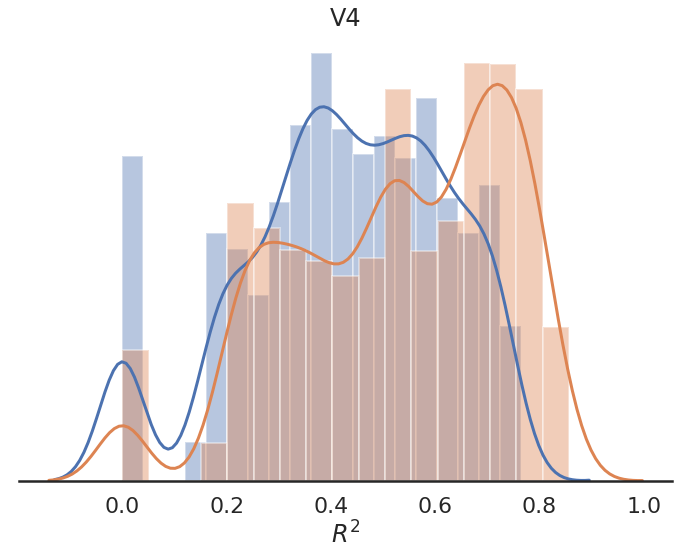

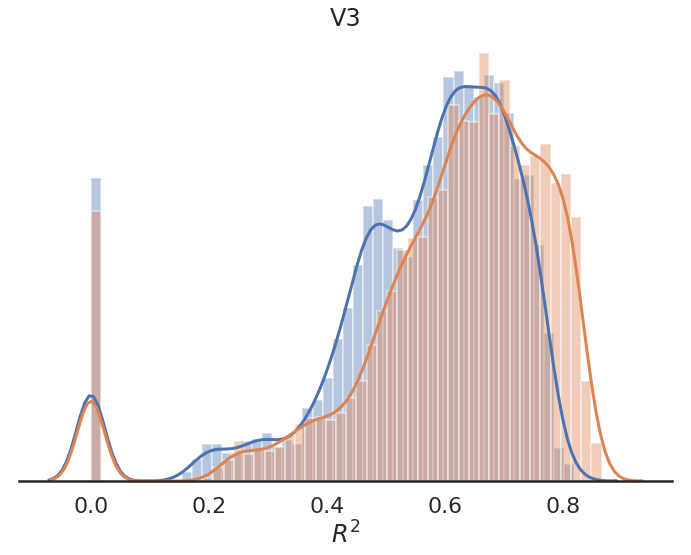

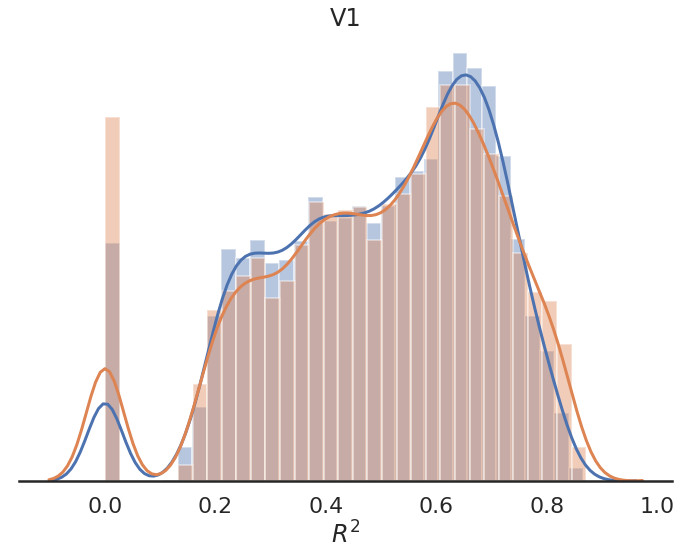

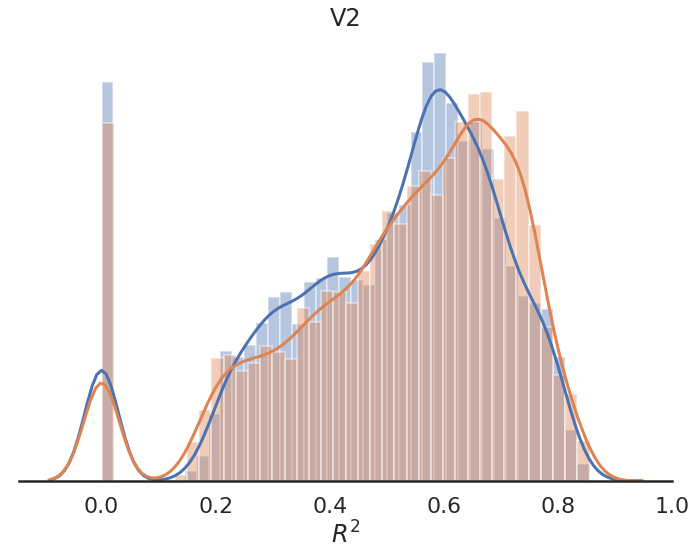

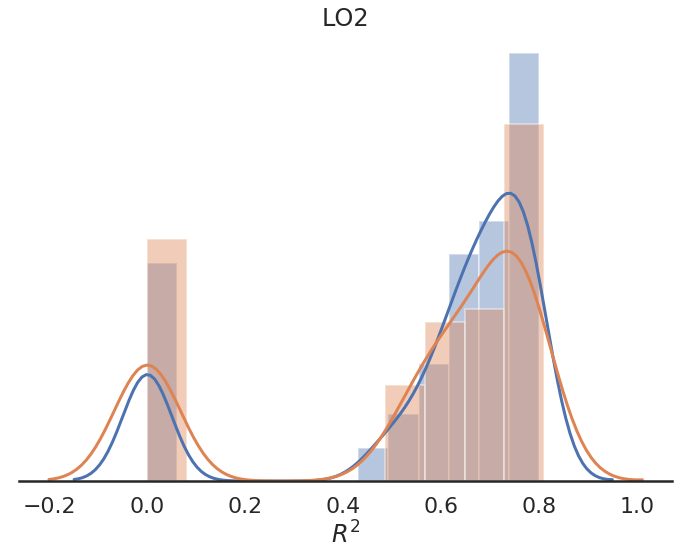

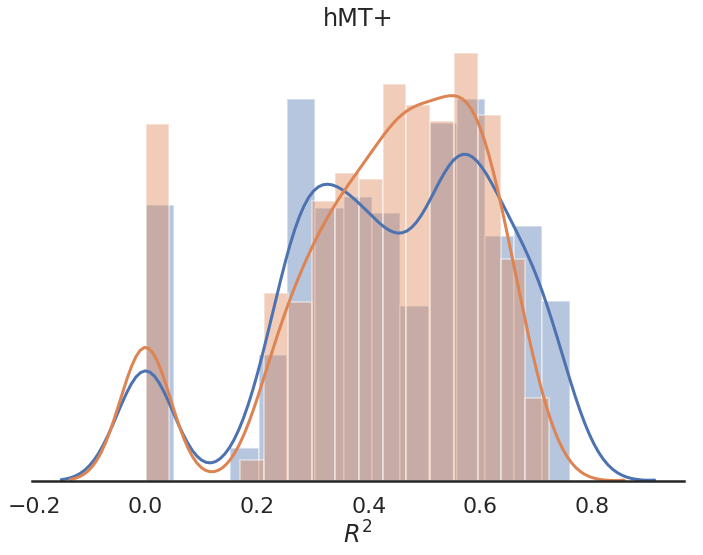

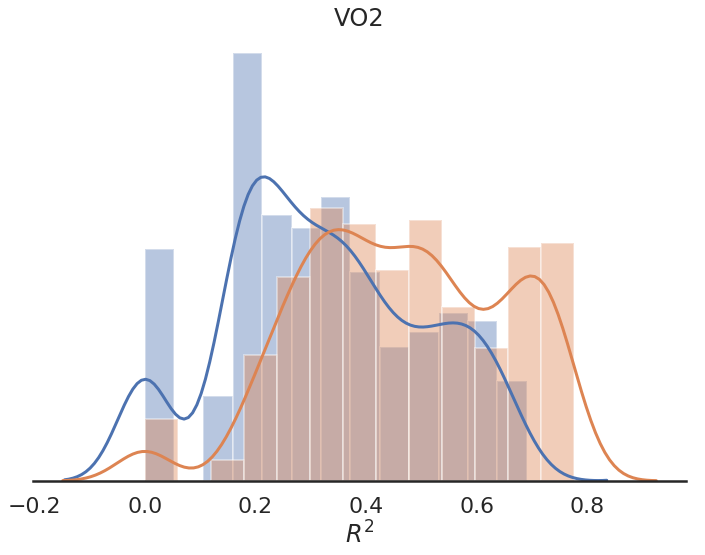

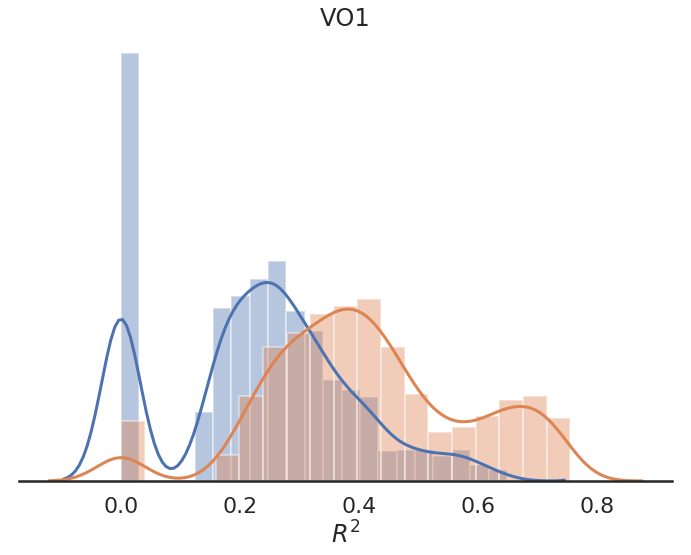

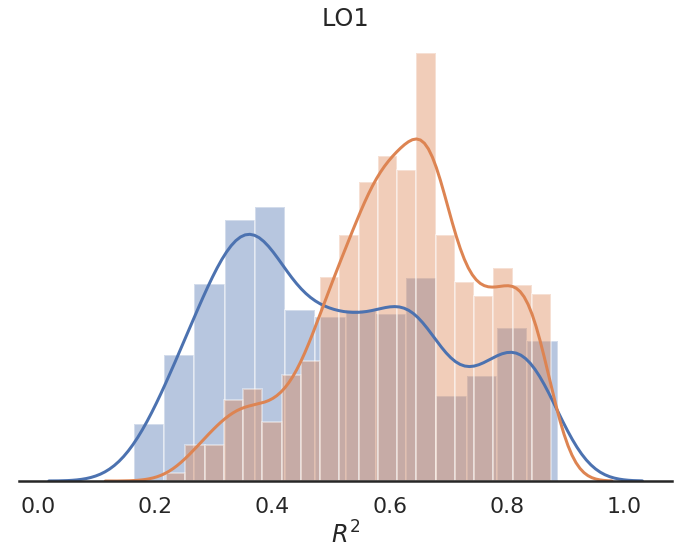

In [9]:
for loc in data.Location.unique():
    plt.figure()
    data1 = data[data.Location == loc]
    a = sns.distplot(data1['R^2'][data1['Condition']=='mot'],label='Motion').set_title(loc)
    a = sns.distplot(data1['R^2'][data1['Condition']=='ret'],label='Retinotopic')
    plt.tick_params(axis='y',which='both', left=False, labelleft=False) 
    sns.despine(top=True,left=True)
    a.set(xlabel=r"$R^2$")

    #plt.legend()
    if loc == "V1" or loc == "LO1" or loc == "hMT+":
        x = a.get_figure()
        #exec('x.savefig("../plots/'+loc+'_r2.jpg")')


### V1

In [10]:
data_v1 = data[data.Location == "V1"]
data_lo1 = data[data.Location == "LO1"]
data_hmt = data[data.Location == "hMT+"]

stat, p = wilcoxon(data_v1['R^2'][data_v1['Condition']=='mot'], data_v1['R^2'][data_v1['Condition']=='ret'])
print(stat, p, p<0.01)

31907803.5 0.00023785900595797336 True


In [11]:
len(data_v1['R^2'][data_v1['Condition']=='mot'])

11819

In [12]:
print("Retinotopic:",np.mean(data_v1['R^2'][data_v1['Condition']=='ret']))
print("Motion:",np.mean(data_v1['R^2'][data_v1['Condition']=='mot']))

Retinotopic: 0.4965210897707069
Motion: 0.49660666553854


### LO1

In [13]:
stat, p = wilcoxon(data_lo1['R^2'][data_lo1['Condition']=='mot'], data_lo1['R^2'][data_lo1['Condition']=='ret'])
print(stat, p, p<0.01)

26136.5 6.660598631337213e-185 True


In [14]:
len(data_lo1['R^2'][data_lo1['Condition']=='mot'])

1279

In [15]:
print("Retinotopic:",np.mean(data_lo1['R^2'][data_lo1['Condition']=='ret']))
print("Motion:",np.mean(data_lo1['R^2'][data_lo1['Condition']=='mot']))

Retinotopic: 0.6234141125879586
Motion: 0.5125182408131349


### hMT+

In [16]:
stat, p = wilcoxon(data_hmt['R^2'][data_hmt['Condition']=='mot'], data_hmt['R^2'][data_hmt['Condition']=='ret'])
print(stat, p, p<0.01)

289296.5 8.874291911313895e-07 True


In [17]:
len(data_hmt['R^2'][data_hmt['Condition']=='mot'])

1256

In [18]:
print("Retinotopic:",np.mean(data_hmt['R^2'][data_hmt['Condition']=='ret']))
print("Motion:",np.mean(data_hmt['R^2'][data_hmt['Condition']=='mot']))

Retinotopic: 0.42569421178343936
Motion: 0.4371507722929937


### Remove Nulls

In [19]:
null = []
for index, row in data.iterrows():
    if sum(row == 0)>5:
        null.append(index)

data = data.drop(null)
data = data.reset_index(drop=True)
data["Eccentricity_bins"] = np.ceil(data.Eccentricity)

## Compare pRF sizes

In [20]:
data_all = pd.DataFrame()
for s in data.Subject.unique():
    data1 = data[data.Subject == s]
    for loc in data1.Location.unique():
        data2 = data1[data1.Location == loc]
        data2["Sigma_mean"]=[np.mean(data2.Sigma[data2.Eccentricity_bins == x]) for x in data2.Eccentricity_bins]
        data_all = pd.concat([data_all, data2])

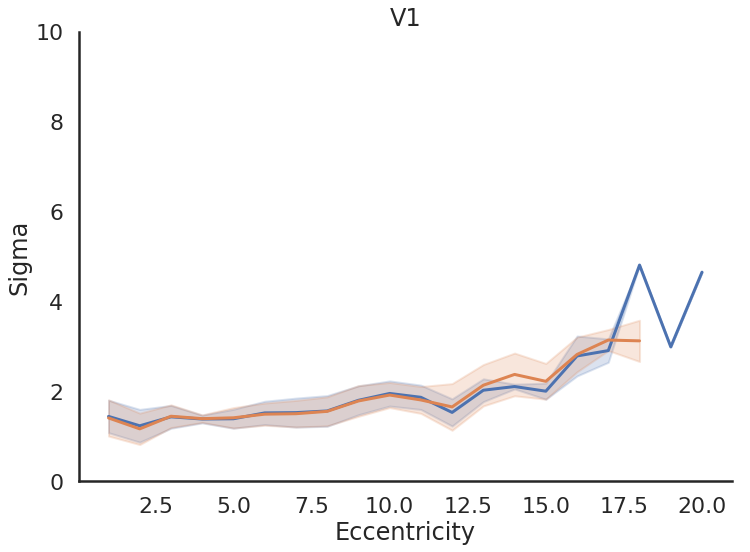

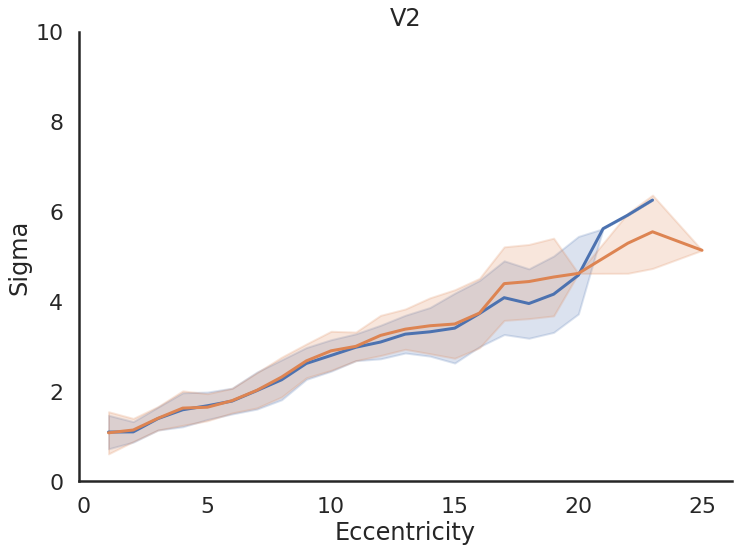

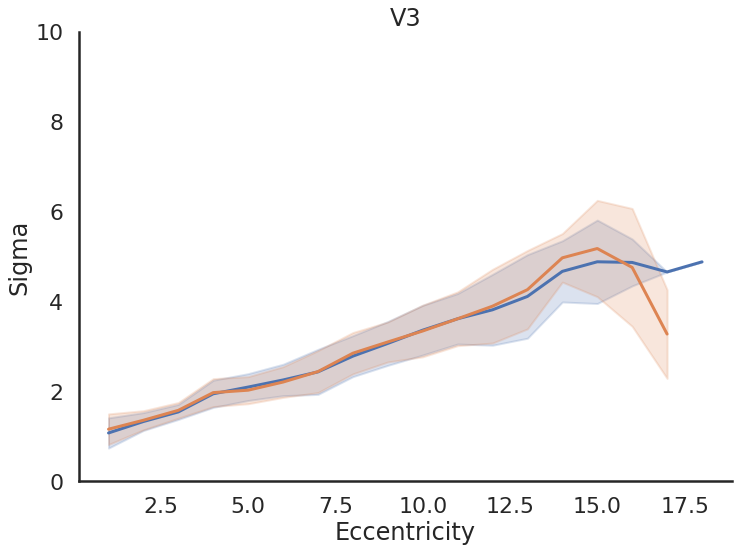

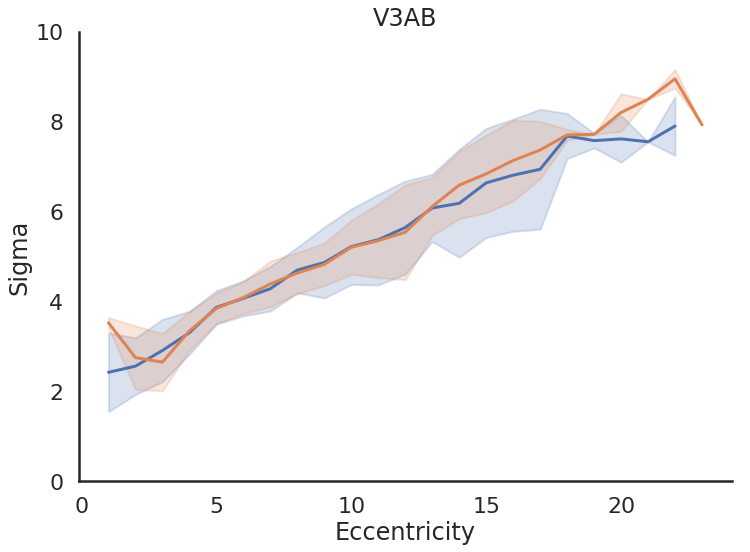

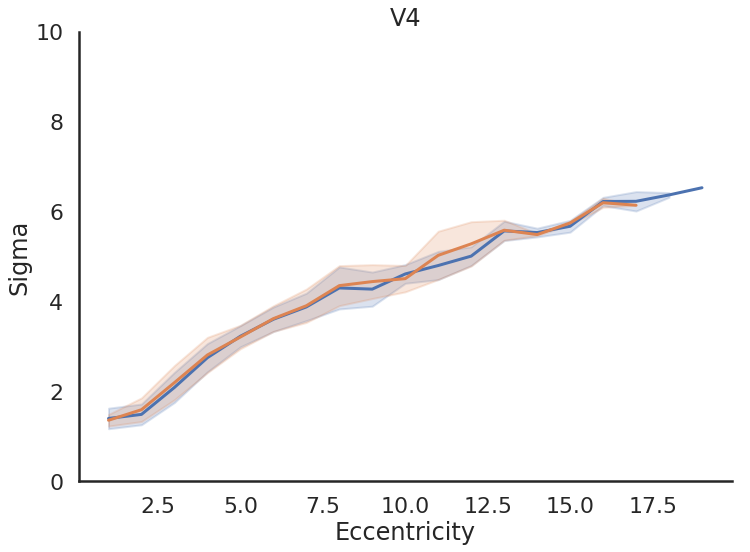

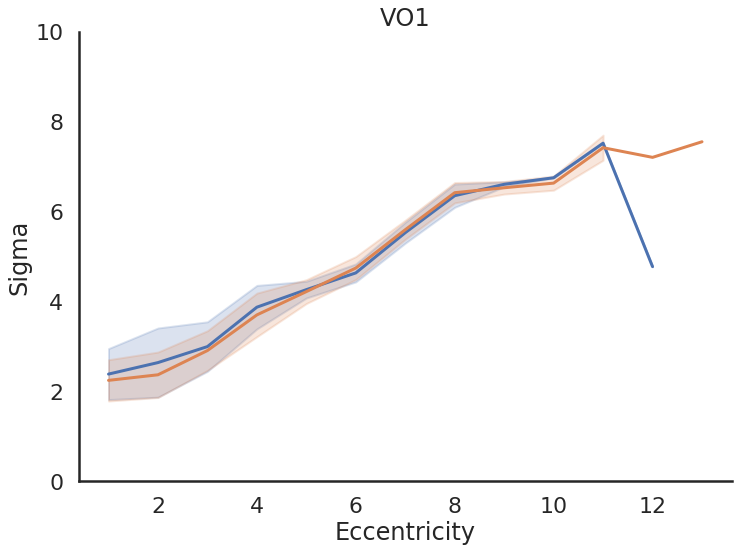

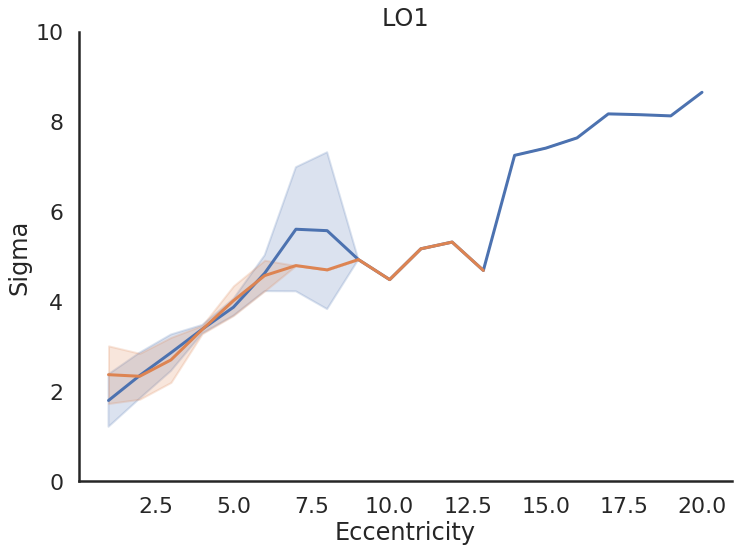

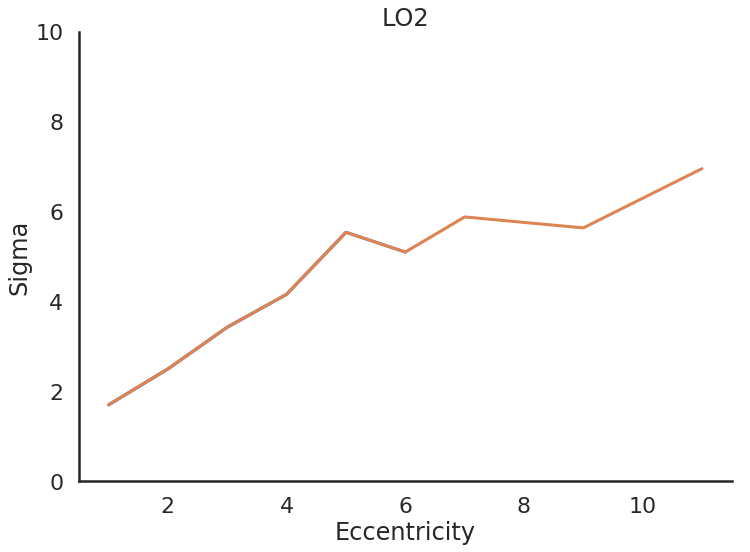

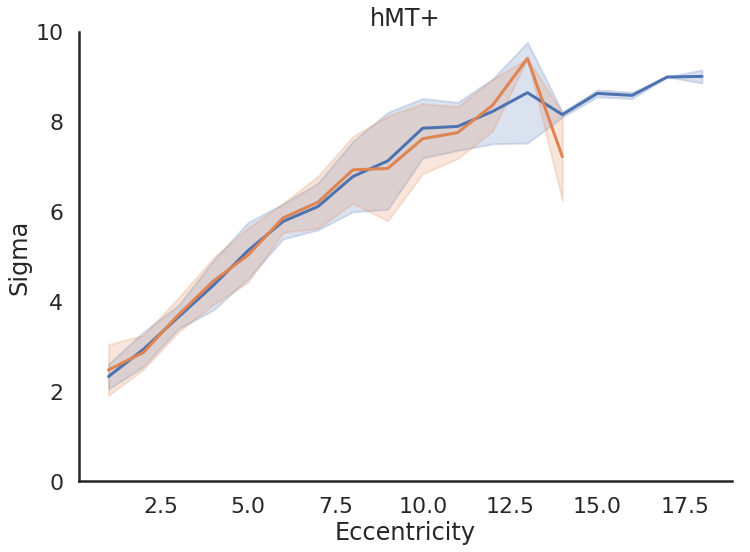

In [21]:
sns.set_context('poster')#,font_scale=1.5,rc={"lines.linewidth": 1.5})
location_sorted = ['V1','V2','V3','V3AB','V4','VO1','LO1','LO2','hMT+']
for loc in location_sorted:
    plt.figure()
    lm = sns.lineplot(y='Sigma_mean', x='Eccentricity_bins', data=data_all[data_all.Location == loc], hue='Condition',err_style="band",ci="sd", estimator="mean", legend=None)
    lm.set(xlabel="Eccentricity",ylabel="Sigma", title=loc)
    plt.ylim([0,10])
    sns.despine()
    if loc == "V1" or loc == "LO1" or loc == "hMT+":
        x = lm.get_figure()
        #exec('x.savefig("../plots/'+loc+'_size.jpg")')